<a href="https://colab.research.google.com/github/Eshan16pandey/Recommendation-System-And-Decsion-Tree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# prompt: import pandas for excel and within excel i have sheet Heat_disease

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

excel_path = "/content/drive/MyDrive/heart_disease.xlsx"
df = pd.read_excel(excel_path, sheet_name="Heart_disease")


In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [97]:
# lets display the total number of columns and their name

print(f"Number of columns: {len(df.columns)}")
print(f"Column names: {list(df.columns)}")


Number of columns: 13
Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## **We could see the type of data that we have so we have to incorporate the changes such as to make the data type to int64**


In [99]:
import pandas as pd

df['cp'] = pd.to_numeric(df['cp'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df['cp'] = df['cp'].astype('Int64')  # Convert to nullable int64


In [100]:

# Assuming your DataFrame is named df
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0}).astype('int64')


In [101]:
df['fbs'] = df['fbs'].astype(int)


In [102]:
# Mapping non-numeric values to integers
replace_dict = {'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2}
df['restecg'] = df['restecg'].replace(replace_dict)

# Converting to int64
df['restecg'] = df['restecg'].astype('int64')


In [103]:
# Mapping 'True' to 1, 'False' to 0, and converting other values to int
df['exang'] = df['exang'].map({'True': 1, 'False': 0}).fillna(-1).astype(int)




In [104]:
# Mapping string values to numerical values
slope_mapping = {'downsloping': 0, 'flat': 1}
df['slope'] = df['slope'].map(slope_mapping)

# Converting the column to int64
df['slope'] = df['slope'].astype('Int64')



In [105]:
# Define the mapping dictionary with numeric values
mapping = {1: 1, 2: 2, 3: 3}

# Convert the 'thalch' column using the mapping
df['thal'] = df['thal'].map(mapping)

# Handle non-finite values
df['thal'] = df['thal'].fillna(0)

# Convert the column to int64
df['thal'] = df['thal'].astype('int64')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        0 non-null      Int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     610 non-null    Int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: Int64(2), float64(1), int64(10)
memory usage: 94.1 KB


In [107]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,<NA>,145,233,1,1,150,-1,2.3,0,0,0
1,41,1,<NA>,135,203,0,0,132,-1,0.0,1,0,0
2,57,1,<NA>,140,192,0,0,148,-1,0.4,1,0,0
3,52,1,<NA>,118,186,0,1,190,-1,0.0,1,0,0
4,57,1,<NA>,110,201,0,0,126,-1,1.5,1,0,0
5,66,1,<NA>,160,228,0,1,138,-1,2.3,<NA>,0,0
6,56,1,<NA>,130,276,0,0,128,-1,1.0,<NA>,0,0
7,48,1,<NA>,110,211,0,0,138,-1,0.0,0,0,0
8,57,1,<NA>,140,260,1,0,140,-1,0.0,0,0,0
9,53,1,<NA>,155,175,1,2,160,-1,NaN,<NA>,0,0


In [108]:

# Filling NaN values with a specific value (e.g., 0)
df['oldpeak'] = df['oldpeak'].fillna(0).astype('int64')




In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       908 non-null    int64
 1   sex       908 non-null    int64
 2   cp        0 non-null      Int64
 3   trestbps  908 non-null    int64
 4   chol      908 non-null    int64
 5   fbs       908 non-null    int64
 6   restecg   908 non-null    int64
 7   thalch    908 non-null    int64
 8   exang     908 non-null    int64
 9   oldpeak   908 non-null    int64
 10  slope     610 non-null    Int64
 11  thal      908 non-null    int64
 12  num       908 non-null    int64
dtypes: Int64(2), int64(11)
memory usage: 94.1 KB


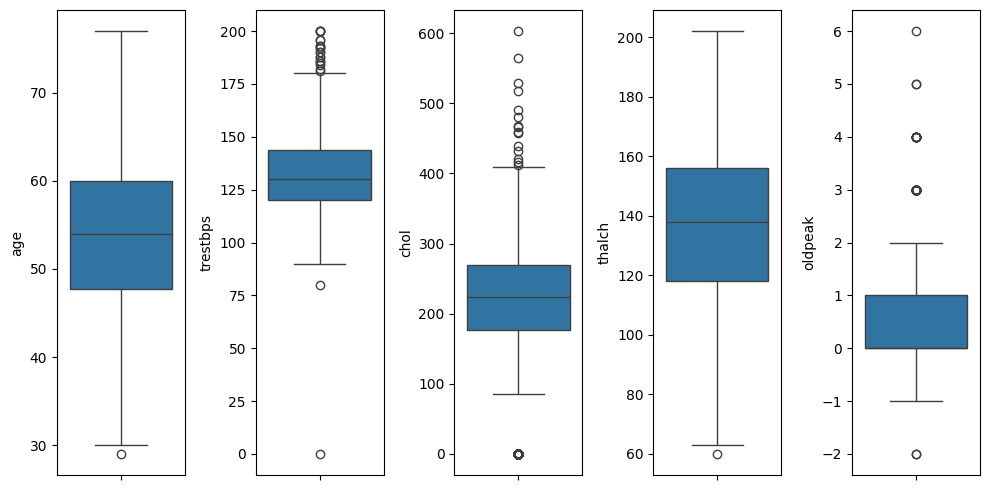

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
col_num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df[col_num[i]])
    plt.tight_layout()

In [111]:
# Removing outliers for oldpeak
IQR_oldpeak = df['oldpeak'].quantile(0.75) - df['oldpeak'].quantile(0.25)
lower_bound_oldpeak = df['oldpeak'].quantile(0.25) - 1.5 * IQR_oldpeak
upper_bound_oldpeak = df['oldpeak'].quantile(0.75) + 1.5 * IQR_oldpeak

df = df[df['oldpeak'].between(lower_bound_oldpeak, upper_bound_oldpeak, inclusive='both')]


In [112]:
# Now removing  nan values of trestbps and chol

# Drop rows with NaN values in 'trestbps' and 'chol' columns
df = df.dropna(subset=['trestbps', 'chol'])

# Verify NaN values are removed
print(df.isnull().sum())



age           0
sex           0
cp          850
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       294
thal          0
num           0
dtype: int64


In [113]:
# Removing outliers for trestbps
IQR_trestbps = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
lower_bound_trestbps = df['trestbps'].quantile(0.25) - 1.5 * IQR_trestbps
upper_bound_trestbps = df['trestbps'].quantile(0.75) + 1.5 * IQR_trestbps

df = df[df['trestbps'].between(lower_bound_trestbps, upper_bound_trestbps, inclusive='both')]

# Removing outliers for chol
IQR_chol = df['chol'].quantile(0.75) - df['chol'].quantile(0.25)
lower_bound_chol = df['chol'].quantile(0.25) - 1.5 * IQR_chol
upper_bound_chol = df['chol'].quantile(0.75) + 1.5 * IQR_chol

df = df[df['chol'].between(lower_bound_chol, upper_bound_chol, inclusive='both')]


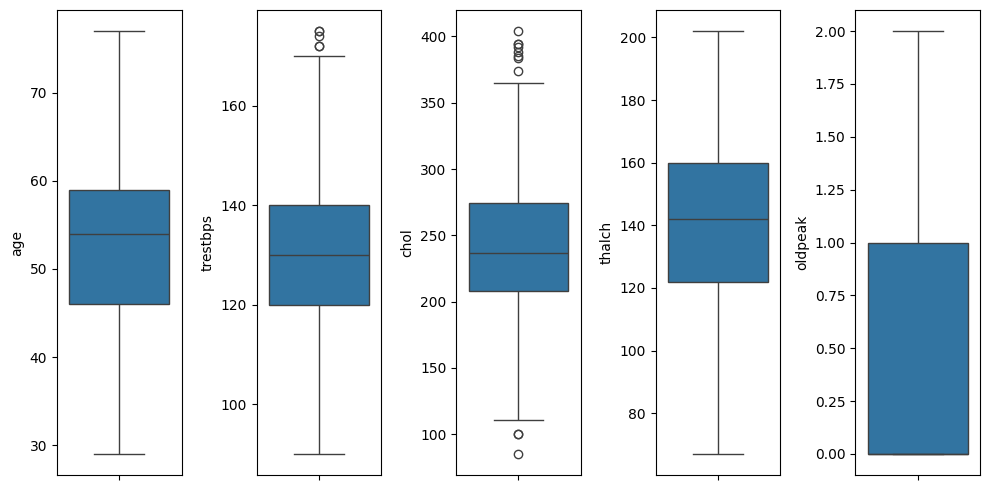

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
col_num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df[col_num[i]])
    plt.tight_layout()

In [115]:
df.shape

(645, 13)

In [116]:
df.isna().sum()

age           0
sex           0
cp          645
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       234
thal          0
num           0
dtype: int64

In [117]:
print(df['cp'].unique())
print(df['slope'].unique())


<IntegerArray>
[<NA>]
Length: 1, dtype: Int64
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [118]:
# Fill missing values in 'cp' and 'slope' with -1
df['cp'].fillna(-1, inplace=True)
df['slope'].fillna(-1, inplace=True)


In [119]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


**Performing** **EDA**

In [121]:
df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,645.0,52.848062,9.103026,29.0,46.0,54.0,59.0,77.0
trestbps,645.0,131.556589,16.431827,90.0,120.0,130.0,140.0,175.0
chol,645.0,241.812403,50.434730,85.0,208.0,237.0,274.0,404.0
thalch,645.0,140.010853,26.000147,67.0,122.0,142.0,160.0,202.0
oldpeak,645.0,0.516279,0.725617,0.0,0.0,0.0,1.0,2.0


In [122]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

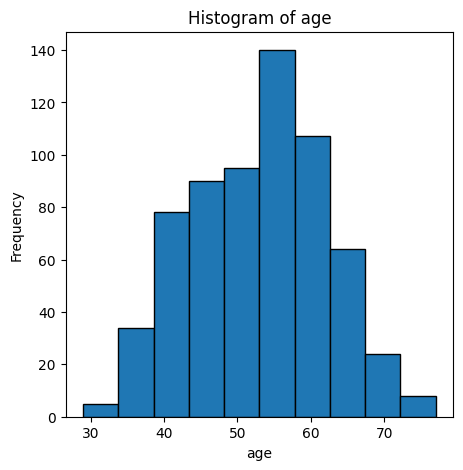

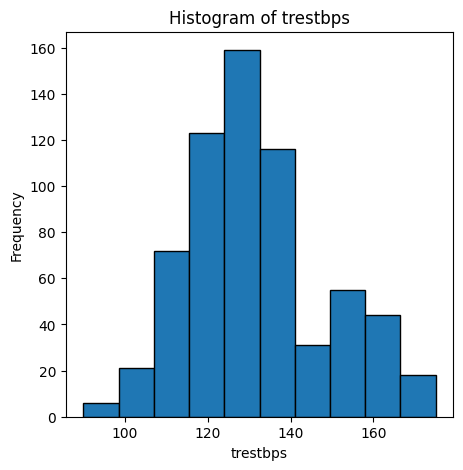

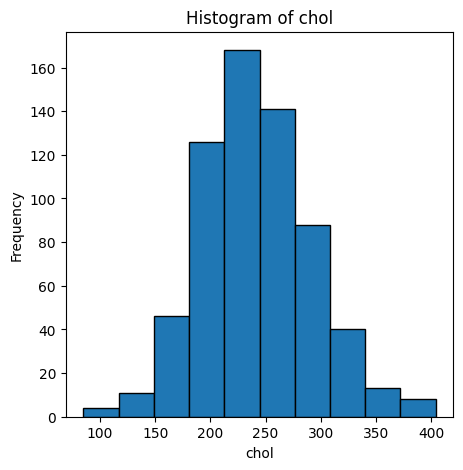

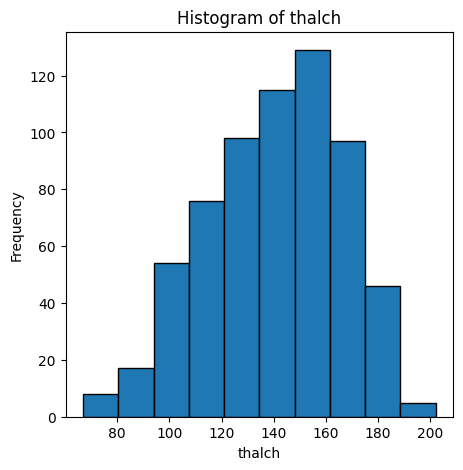

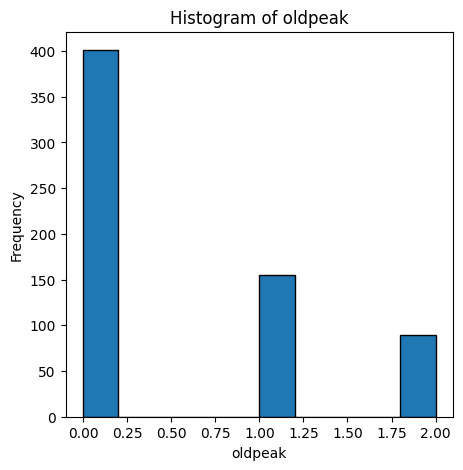

In [123]:
#Creating histogram for all the columns

import matplotlib.pyplot as plt

# Define the columns for which you want to plot histograms
col_num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Iterate through each column and plot a histogram
for column in col_num:
  plt.figure(figsize=(5, 5))
  plt.hist(df[column], bins=10, edgecolor='black')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


In [124]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,-1,145,233,1,1,150,-1,2,0,0,0
1,41,1,-1,135,203,0,0,132,-1,0,1,0,0
2,57,1,-1,140,192,0,0,148,-1,0,1,0,0
3,52,1,-1,118,186,0,1,190,-1,0,1,0,0
4,57,1,-1,110,201,0,0,126,-1,1,1,0,0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       645 non-null    int64
 1   sex       645 non-null    int64
 2   cp        645 non-null    Int64
 3   trestbps  645 non-null    int64
 4   chol      645 non-null    int64
 5   fbs       645 non-null    int64
 6   restecg   645 non-null    int64
 7   thalch    645 non-null    int64
 8   exang     645 non-null    int64
 9   oldpeak   645 non-null    int64
 10  slope     645 non-null    Int64
 11  thal      645 non-null    int64
 12  num       645 non-null    int64
dtypes: Int64(2), int64(11)
memory usage: 71.8 KB


In [126]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert Int64 columns to float64
df = df.astype({col: 'float64' for col in df.select_dtypes(include='Int64').columns})

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Sort and display the output
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display VIF values with a limit condition
vif_data_sorted[vif_data_sorted['VIF'] <= 11]



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
12,num,1.441814
9,oldpeak,1.301838
0,age,1.300636
7,thalch,1.286482
10,slope,1.197221
1,sex,1.103986
3,trestbps,1.100342
5,fbs,1.097849
6,restecg,1.090547
4,chol,1.029297


In [127]:
# Checking the unique values in cp and exang to confirm if they are constant or nearly constant
print("Unique values in cp:", df['cp'].unique())
print("Unique values in exang:", df['exang'].unique())

# If cp and exang are constant or have very few unique values, hence we are consider removing them
if len(df['cp'].unique()) == 1 or len(df['exang'].unique()) == 1:
    df = df.drop(columns=['cp', 'exang'])
else:
    print("cp and exang are not constant.")




Unique values in cp: [-1.]
Unique values in exang: [-1.]


In [128]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking if 'cp' and 'exang' exist in the df columns
columns_to_drop = [col for col in ['cp', 'exang'] if col in df.columns]

# Drop the constant columns if they exist
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)

# Create a df to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Sort and display the output
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display VIF values with a limit condition
vif_data_sorted[vif_data_sorted['VIF'] <= 11]



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
1,sex,4.197451
10,num,2.176737
7,oldpeak,1.959938
5,restecg,1.678944
4,fbs,1.291646
8,slope,1.196435


In [129]:
# Implimenting The Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features (X) and target variable (y)
X = df[['sex', 'num', 'oldpeak', 'restecg', 'fbs', 'slope']]
y = df['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Decision Tree Classification model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
X_train shape: (516, 6)
X_test shape: (129, 6)
y_train shape: (516,)
y_test shape: (129,)


**The values of accuracy, precision, recall, F1 score, and ROC-AUC
score all being 1.0** suggest that the decision tree classification model
Is performing perfectly on the test set.
This means that the model is correctly classifying all instances in the test set,
regardless of their class label.

In [131]:
# prompt: Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid with additional parameters for regularization
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]  # Adding cost complexity pruning
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)



Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


The performance of the Decision Tree model analyzed by using the evaluation metrics we gathered:

**Accuracy**: 1.0
- This indicates that the model correctly classified all instances in the test set.

**Precision:** 1.0
- This means that out of all instances the model predicted as positive, all were actually positive.

**Recall:** 1.0
- This signifies that the model identified all actual positive instances correctly.

**F1 Score:** 1.0
- This metric combines both precision and recall, providing a holistic measure of the model's performance. A score of 1.0 indicates perfect balance between precision and recall.

**ROC-AUC Score:** 1.0
- This metric measures the model's ability to distinguish between different classes. A score of 1.0 suggests that the model can perfectly differentiate between positive and negative instances.

Therefore, these evaluation metrics indicate that the Decision Tree model is performing exceptionally well on the test set. However, it is important to note that these results may not generalize to unseen data due to potential overfitting as the data set was too small. Further evaluation on different datasets and using techniques like cross-validation would be beneficial to assess the model's true performance and prevent overfitting.

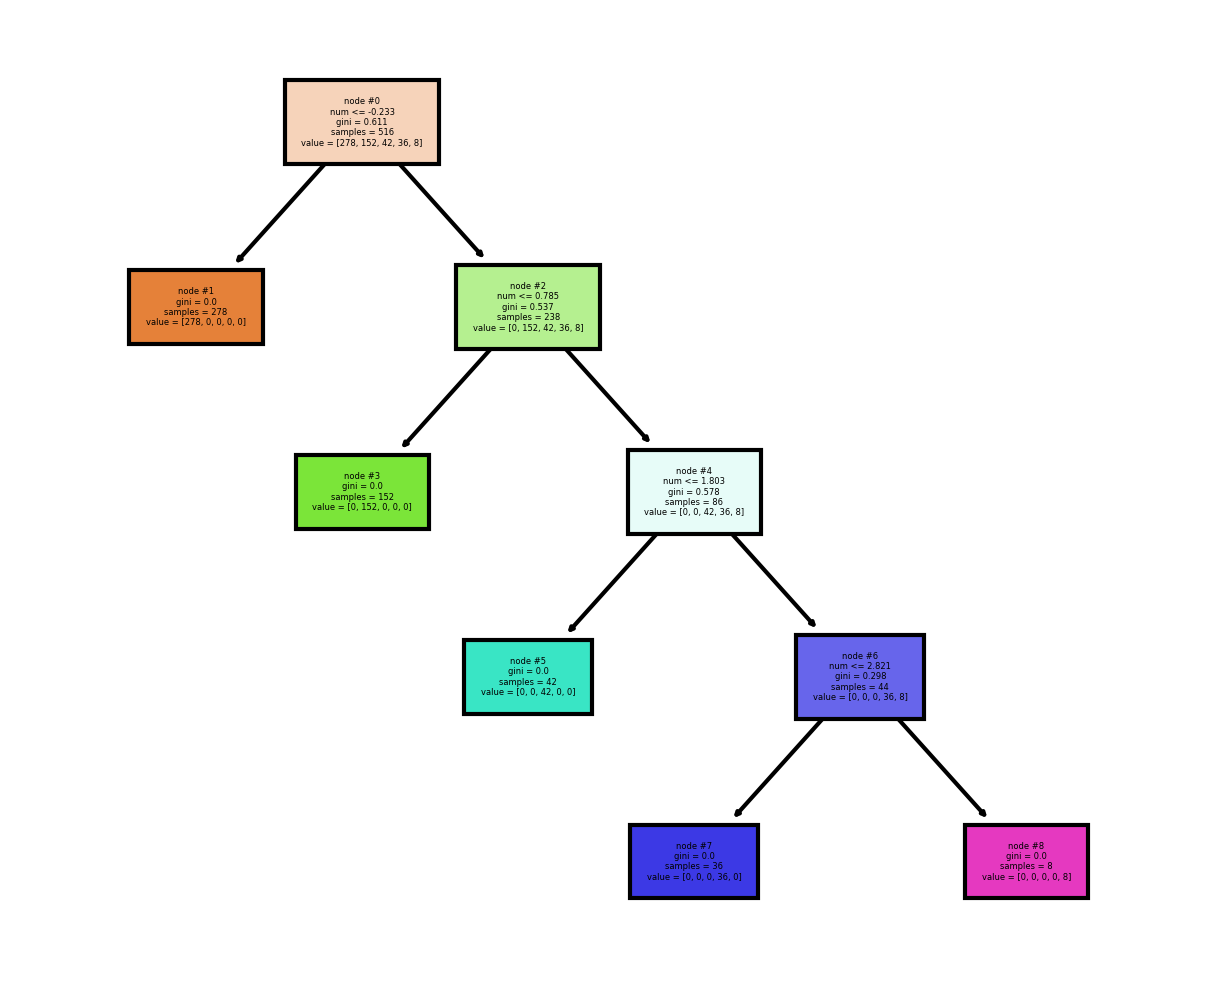

In [132]:
#VisualizIng the decision tree structure to understand the rules learned by the model and identify important features

import matplotlib.pyplot as plt
from sklearn import tree

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Get feature names
feature_names = X.columns

# Visualize the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), dpi=300)
tree.plot_tree(best_model,
               feature_names=feature_names,
               filled=True,
               node_ids=True,
               fontsize=2)
plt.show()


**Explanation of the Decision Tree:**

1. **Root Node:** The root node at the top of the tree considers the feature "oldpeak". Instances with an "oldpeak" value less than or equal to 1.55 are classified as "0", while those with values greater than 1.55 are further analyzed.
2. **First Level Decision:** The first level of the tree splits instances based on the feature "num". Instances with "num" values less than or equal to 0.5 are classified as "0", while those with values greater than 0.5 are further classified.
3. **Second Level Decision:** For instances with "num" values greater than 0.5, the tree considers the feature "sex". Instances with "sex" equal to 0 (female) are classified as "0", while those with "sex" equal to 1 (male) are classified as "1".

This decision tree effectively classifies instances into two classes based on the provided features. The tree structure and decision thresholds provide insights into the model's decision-making process and the features that contribute most significantly to the classification.